# Batch Normalization in Neural Network:
- Batch Normalization is an algorithmic method which makes the training of neural networks faster and more stable.
- It consists of Normalization of activation vector from hiddern layer using the mean and variance of current Batch. This normalization is applied right befor(or right after) the nonlinear function.
- Normalize means that mean= 0,std = 1.
# Why we need Batch Normalization ?
## Unnormalized Data:
- if data is unnormalized then training will slow of neural network , due to small value of learning. while when we use BN then training will become more faster.
## Internal Covariate Shift:
- we define internal covariate shift as then change in distribution of network activation due to the change in network parameter during training.

# How to use Batch Normalization:
Batch Normalization involve two stage  first is : **Normalizing** and second is : **Scale and Shift**
## First Stage:
- Two things should always remember during BN first things is : Mini Batach GD and second is: layer by layer apply normalization for each neuron.
- here is two way to use it just look below:
1. Z11 ---> Z11)n ---> g(Z11)n) ---> a11  
2. Z11 ---> g(Z11) ---> a11 ---> a11)n

where ,
- Z11 = output of neuran , w11 * x1 = w12 * x2 + b11
- Z11)n = pass Z11 in Batch Normalization layer
- g(Z11)n) = pass normalized value in activation
- a11 = finally find normalized activation value means it is mean centric value.
3. always remember we need to do batch normalization for each and every neuron.
### How to Calculate Z11)n:
- Z11)n = ( Z11 - mean) / (std + error tearm )
- for calculating mean we need to decide first **Batch Size**
## Second Stage:
1. suppose i have add Batch Normalization layer in neural network but in case where Batch Normalization not required so how to handle it ? by scale and shift
2. scale and shift basically is opposite operation of batch normalization and it can be calculated by this
- Z11)BN = Y(gamma) * Z11)n + B(beta)
    - where gamma = sigma(std) + error term , beta = mue(mean)
- where gamma and beta are learnaable parameter
3. How to implement it:
- **Z11 ---> Z11)n ---> Z11)BN ---> g(Z11)n) ---> a11** 

## For Deep Neural Networks:
 - for DNN batch normalization treat as layer 
 - during backpropogation gama and bete  also change , just like weight and bias
 -  **γ' =  γ - learning rate * $L / $y**
## Batch Normalization during testing :
- in testing for single query how we can calculate mue and sigma , here no batch size like training data.
- it's can handled by **Exponentially Weighted Moving Average (EWMA)**

In [52]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/concertriccir2/concertriccir2.csv


In [53]:
df = pd.read_csv("/kaggle/input/concertriccir2/concertriccir2.csv")

In [54]:
df.head()

,7.003345706103683010e-01,-2.470675778972781789e-01,0.000000000000000000e+00
0,-3.950019,2.740080,1.0
1,0.150222,-2.157638,1.0
2,-1.672050,-0.941519,1.0
3,2.560483,-1.846577,1.0
4,-1.724979,3.463930,1.0


In [55]:
# Rename columns
df.rename(columns = {"7.003345706103683010e-01":'X',"-2.470675778972781789e-01":'Y',"0.000000000000000000e+00":'class'},inplace=True)

In [56]:
df

,X,Y,class
0,-3.950019,2.740080,1.0
1,0.150222,-2.157638,1.0
2,-1.672050,-0.941519,1.0
3,2.560483,-1.846577,1.0
4,-1.724979,3.463930,1.0
...,...,...,...
494,2.177895,2.984489,1.0
495,1.778905,2.869205,1.0
496,0.894180,3.069959,0.0
497,0.849439,3.875435,0.0


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       499 non-null    float64
 1   Y       499 non-null    float64
 2   class   499 non-null    float64
dtypes: float64(3)
memory usage: 11.8 KB


In [58]:
df.shape

(499, 3)

In [59]:
df.isnull().sum()

X        0
Y        0
class    0
dtype: int64

In [60]:
df.duplicated().sum()

0

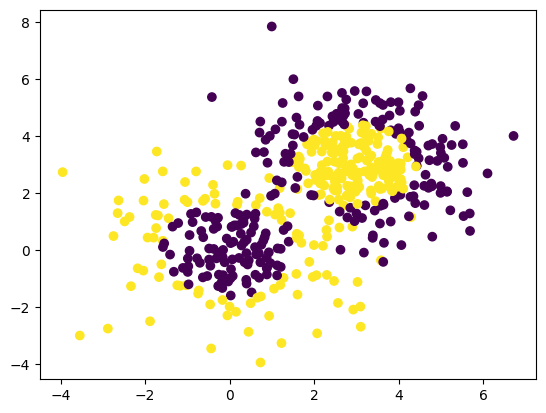

In [61]:
plt.scatter(df['X'],df['Y'],c = df['class'])

In [62]:
# Divide X and y
X = df.iloc[:,0:2].values
y =df.iloc[:,-1].values

In [63]:
import tensorflow
from tensorflow import keras
from keras.layers import Dense
from keras import Sequential
from tensorflow.keras.layers import BatchNormalization


# Build Model without Batch Normalization:

In [65]:
model = Sequential()

model.add(Dense(2,activation='relu',input_dim=2))
model.add(Dense(2,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [66]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15 (60.00 B)

 Trainable params: 15 (60.00 B)

 Non-trainable params: 0 (0.00 B)

In [67]:
model.compile(loss= 'binary_crossentropy',optimizer= 'adam',metrics=['accuracy'])

In [68]:
history1 = model.fit(X,y,epochs=200,validation_split=0.2)

Epoch 1/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.3973 - loss: 0.7761 - val_accuracy: 0.4100 - val_loss: 0.7898
Epoch 2/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4475 - loss: 0.7133 - val_accuracy: 0.4100 - val_loss: 0.7788
Epoch 3/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4049 - loss: 0.7289 - val_accuracy: 0.3900 - val_loss: 0.7681
Epoch 4/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4237 - loss: 0.7129 - val_accuracy: 0.3700 - val_loss: 0.7581
Epoch 5/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4460 - loss: 0.7216 - val_accuracy: 0.4200 - val_loss: 0.7491
Epoch 6/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4141 - loss: 0.7144 - val_accuracy: 0.4300 - val_loss: 0.7415
Epoch 7/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4334 - loss: 0.6955 - val_accuracy: 0.4100 - val_loss: 0.7346
Epoch 8/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4425 - loss: 0.6972 - val_accuracy: 0.4100 - 

# Build Model with Batch Normalization:

In [69]:
model = Sequential()

model.add(Dense(2,activation='relu',input_dim=2))
model.add(BatchNormalization())
model.add(Dense(2,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1,activation='sigmoid'))

In [70]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 2)              │             8 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 2)              │             8 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31 (124.00 B)

 Trainable params: 23 (92.00 B)

 Non-trainable params: 8 (32.00 B)

In [71]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [72]:
history2 = model.fit(X,y,epochs=200,validation_split=0.2)

Epoch 1/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.4232 - loss: 0.7276 - val_accuracy: 0.4300 - val_loss: 1.2401
Epoch 2/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4380 - loss: 0.7236 - val_accuracy: 0.4300 - val_loss: 1.0413
Epoch 3/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4716 - loss: 0.7053 - val_accuracy: 0.4400 - val_loss: 0.9417
Epoch 4/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4260 - loss: 0.7135 - val_accuracy: 0.4500 - val_loss: 0.8824
Epoch 5/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4727 - loss: 0.7115 - val_accuracy: 0.4700 - val_loss: 0.8408
Epoch 6/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4974 - loss: 0.6827 - val_accuracy: 0.4800 - val_loss: 0.8139
Epoch 7/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4732 - loss: 0.6886 - val_accuracy: 0.5000 - val_loss: 0.7938
Epoch 8/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4758 - loss: 0.6925 - val_accuracy: 0.5100 - 

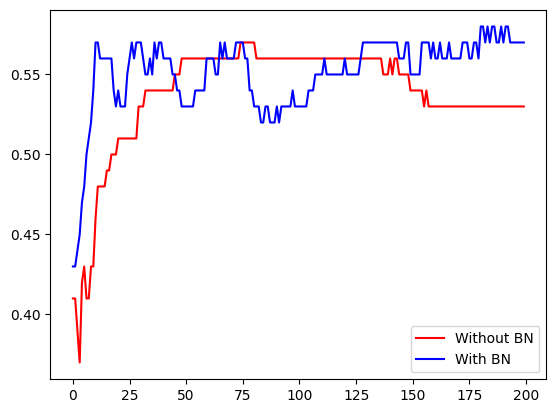

In [73]:
plt.plot(history1.history['val_accuracy'],color='red')
plt.plot(history2.history['val_accuracy'],color='blue')
plt.legend(['Without BN','With BN'])